<IPython.core.display.Javascript object>


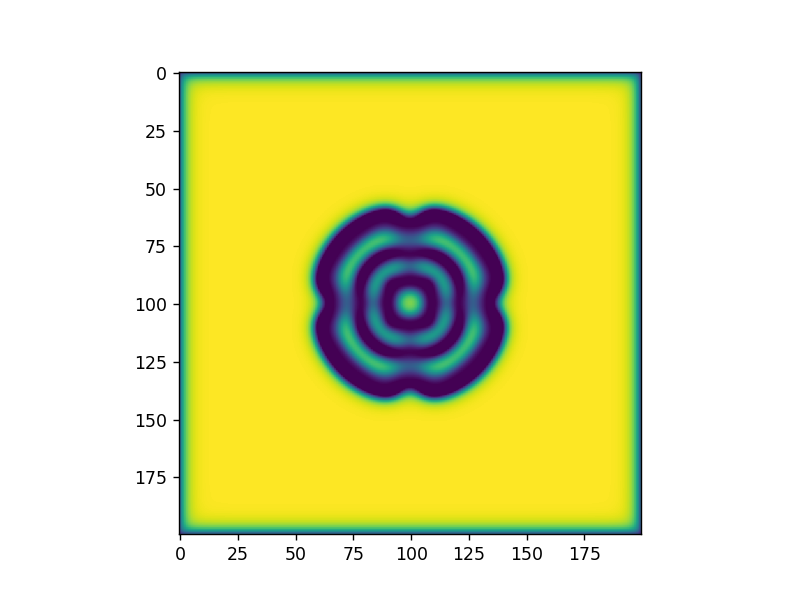

In [1]:
import time
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy import signal
import numpy as np
import random

# Parameters
Da = 1
Db = 0.4
f = 0.05
k = 0.06
dt = 1

# Laplacian kernel
L = np.array([[0.05, 0.2, 0.05], [0.2, -1, 0.2], [0.05, 0.2, 0.05]])
    
class Skin:
    # Input variables for the skin
    m = 200        # skin will be m by m where m = skin size

    # Initialize the skin
    a = np.ones([m, m])   # activator
    b = np.zeros([m, m])  # inhibitor
    b[int(m / 2 - 5):int(m / 2 + 5), int(m / 2 - 5):int(m / 2 + 5)] = 1
    pat = a - b  #pattern

# Update the pattern based on the reaction-diffusion system, each call to update_skin is one time step
def update_skin(sk):
    La = signal.convolve(sk.a, L, mode='same') 
    Lb = signal.convolve(sk.b, L, mode='same')
    an = sk.a + dt * (Da * La - sk.a * sk.b**2 + f * (1 - sk.a))
    bn = sk.b + dt * (Db * Lb + sk.a * sk.b**2 - (k + f) * sk.b)
    sk.a = an
    sk.b = bn
    im = an - bn
    return im

my_skin = Skin()

##### Animate the pattern #####

# Required line for plotting the animation
%matplotlib notebook
# Initialize the plot of the skin that will be used for animation
fig = plt.gcf()
# Show first image - which is the initial pattern
im = plt.imshow(my_skin.pat)
plt.show()

# Helper function that updates the pattern and returns a new image of
# the updated pattern. animate is the function that FuncAnimation calls
def animate(frame):
    im.set_data(update_skin(my_skin))
    return im,

# This line creates the animation
anim = animation.FuncAnimation(fig, animate, frames=1000, 
                               interval=5)